In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# Sex 칼럼 문자 => 라벨 인코딩

In [3]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts().sort_index()

Sex
0    1307
1    1342
2    1528
Name: count, dtype: int64

# 상관관계 행렬 그리기

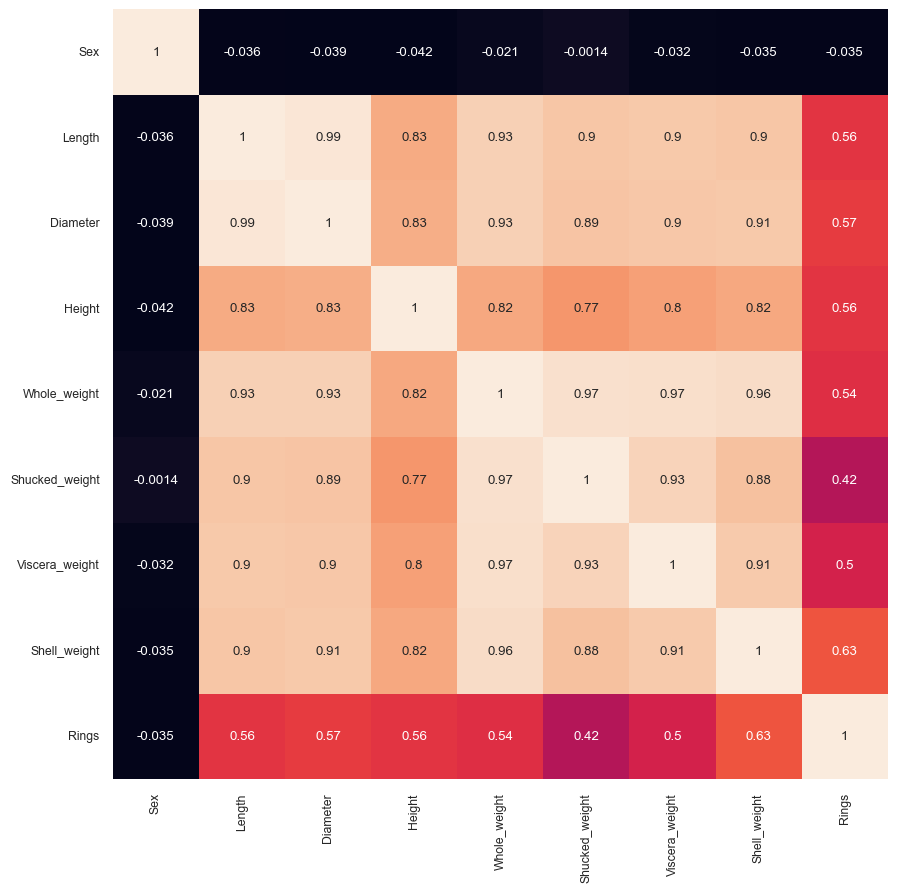

In [4]:
df_corr = df.corr() # 상관관계 행렬 

#히트맵
plt.figure(figsize=(10,10)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# shell_weight 열의 인덱스 찾기(FOR 산점도)

In [25]:
shell_weight_index = df.columns.get_loc('Shell_weight')

print(f'shell_weight 열의 인덱스: {shell_weight_index}')

shell_weight 열의 인덱스: 7


## 데이터 준비

In [6]:
X = df.drop('Rings', axis=1) 
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

# 데이터를 시퀀스 데이터로 변환하기

In [9]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

## 컬럼과 레이블 병합하기

In [10]:
y_train = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test = np.array(y_test)
test_set = np.c_[X_test, y_test]

## 훈련, 검증 세트 각각 시퀀스 데이터로 만들기

In [11]:
n_step = 3 

X_train, y_train = split_sequences(train_set, n_step)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, n_step)
print(X_test.shape, y_test.shape) 

(3339, 3, 8) (3339,)
(834, 3, 8) (834,)


## 모델 구축을 위해 shape 저장

In [12]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
print(n_timesteps, n_features)

3 8


# LSTM 모델 구축

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 1D CNN 층 추가
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2, padding='same')) # padding='same' => 풀링을 진행해도 크기는 안 줄어들게 설정

# LSTM 층 추가
model.add(LSTM(units=128))

# Dense 층 추가
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='mse', metrics=['mse'])

In [18]:
epochs=30
history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 61.6498 - mse: 61.6498 - val_loss: 8.1740 - val_mse: 8.1740
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.5548 - mse: 7.5548 - val_loss: 7.3667 - val_mse: 7.3667
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4928 - mse: 7.4928 - val_loss: 7.4546 - val_mse: 7.4546
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5919 - mse: 6.5919 - val_loss: 7.1349 - val_mse: 7.1349
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4887 - mse: 6.4887 - val_loss: 7.2895 - val_mse: 7.2895
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9961 - mse: 6.9961 - val_loss: 6.7563 - val_mse: 6.7563
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5714 - mse: 6.5714 - val_loss: 6.6550 - val_mse: 6.6550
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9445 - mse: 5.9445 - val_loss: 6.8208 - val_mse: 6.8208
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

# 모델 평가

## 정확도

In [19]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4803 - mse: 5.4803


[5.7948503494262695, 5.7948503494262695]

## 손실값 체크 

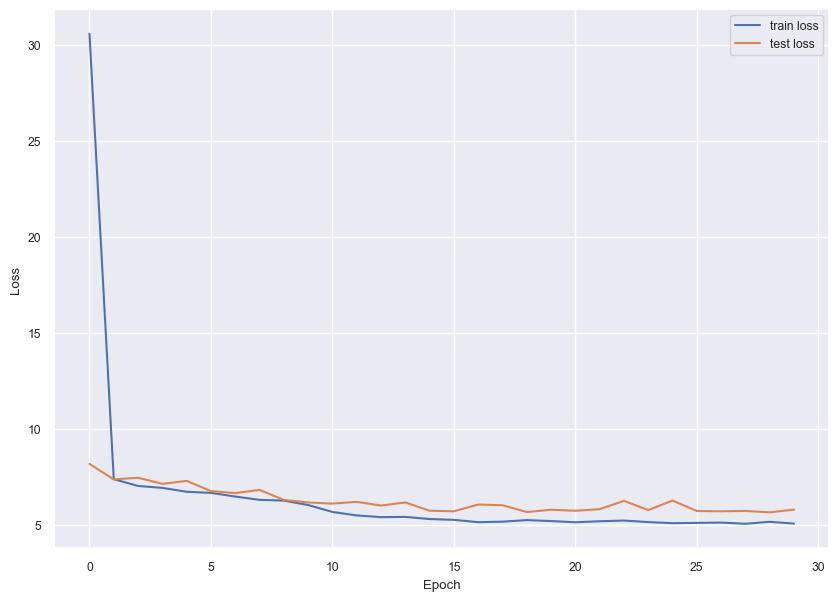

In [20]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(epochs), history.history['loss'], label='train loss')
plt.plot(range(epochs), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 실제값 예측값 비교(산점도)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


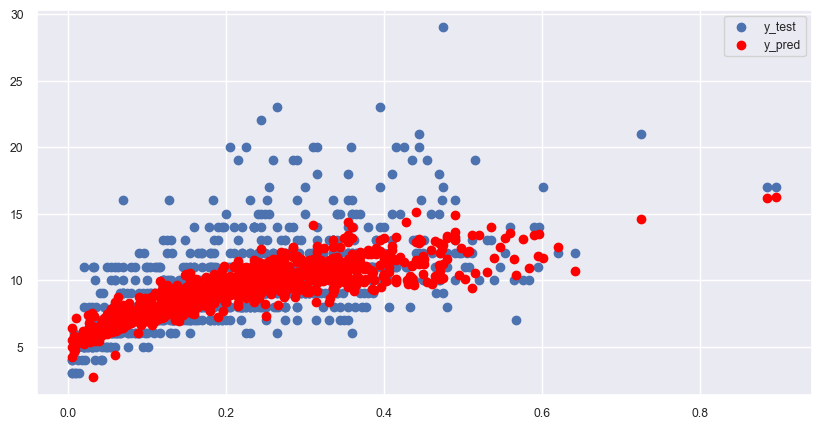

In [36]:
y_pred = model.predict(X_test) # 예측값 

y_test.shape, y_pred.shape
plt.figure(figsize=(10,5)) 
plt.scatter(X_test[:,0,shell_weight_index], y_test, label='y_test') # SkinThickness는 3번째 열, [:, 2]는 모든 행중 2번째 열을 선택하라는 뜻
plt.scatter(X_test[:,0,shell_weight_index], y_pred, c='red' ,label="y_pred") # 예측값 분포
plt.legend() # 범례 표시 
plt.show()

(834,)